# Drawing Conclusions and Communicating Results
Using `store_data.csv` to answer the quiz questions below.

In [46]:
# imports and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('store_data.csv')

In [83]:
# Downloading csv file from notebook

import base64
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

In [47]:
# explore data
df.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [48]:
# total sales for the last month
type(df['week'][0])

df['week'] = pd.to_datetime(df['week'])
x = df[df['week'] == '2014-05-04']

In [49]:
# Years of data included
year = pd.DatetimeIndex(df['week']).year
set(year)

{2014, 2015, 2016, 2017, 2018}

In [54]:
df['year'] = df['week'].dt.year
df['month'] = df['week'].dt.month
df['day'] = df['week'].dt.day
df.tail(10)

,week,storeA,storeB,storeC,storeD,storeE,year,month,day
190,2017-12-24,8976,9503,6240,3882,2890,2017,12,24
191,2017-12-31,11875,1527,6711,5265,1701,2017,12,31
192,2018-01-07,8978,11312,4158,5019,3842,2018,1,7
193,2018-01-14,6963,4014,4215,7153,3097,2018,1,14
194,2018-01-21,5553,3971,3761,6255,3071,2018,1,21
195,2018-01-28,282,6351,7759,5558,1028,2018,1,28
196,2018-02-04,4853,6503,4187,5956,1458,2018,2,4
197,2018-02-11,9202,3677,4540,6186,243,2018,2,11
198,2018-02-18,3512,7511,4151,5596,3501,2018,2,18
199,2018-02-25,7560,6904,3569,5045,2585,2018,2,25


In [52]:
df_final = df[(df['month'] == 12)]
df_final

dict1 = dict()

for col in df.columns:
    if col[:5] == 'store':
        total = df_final[col].sum()
        dict1[col] = total
dict1

{'storeA': 115686,
 'storeB': 97272,
 'storeC': 90668,
 'storeD': 87897,
 'storeE': 37272}

In [24]:
df_last_month = pd.DataFrame([(k,v) for k, v in dict1.items()], columns=['Stores', 'Total Sales'])
df_last_month

,Stores,Total Sales
0,storeA,87591
1,storeB,79394
2,storeC,66538
3,storeD,75190
4,storeE,27334


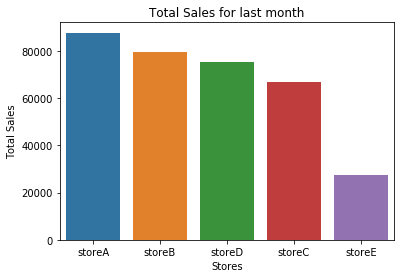

In [71]:
x = df_last_month['Stores']
y = df_last_month['Total Sales']
sort = df_last_month.sort_values('Total Sales',ascending=False).Stores
sns.barplot(x=x,y=y,data=df_last_month,order=sort);
plt.xlabel('Stores')
plt.ylabel('Total Sales')
plt.title('Total Sales for last month')
plt.show()

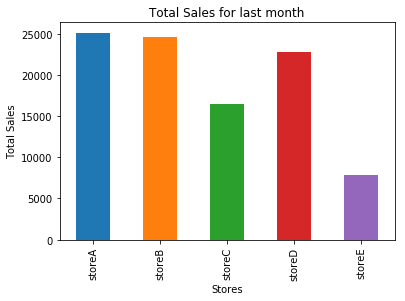

In [72]:
# Other Way:
df.iloc[196:,1:6].sum().plot(kind='bar')
plt.xlabel('Stores')
plt.ylabel('Total Sales')
plt.title('Total Sales for last month')
plt.show()

In [38]:
# average sales
dict2 = dict()
for col in df.columns:
    if col[:5] == 'store':
        total = df[col].mean()
        dict2[col] = total
dict2.items()

dict_items([('storeA', 5865.4799999999996), ('storeB', 6756.71), ('storeC', 4942.1049999999996), ('storeD', 5431.4049999999997), ('storeE', 2580.0250000000001)])

In [40]:
df_avg = pd.DataFrame([ (k,v) for k,v in dict2.items()],columns=['Stores','Avg Sales'])
df_avg

,Stores,Avg Sales
0,storeA,5865.480
1,storeB,6756.710
2,storeC,4942.105
3,storeD,5431.405
4,storeE,2580.025


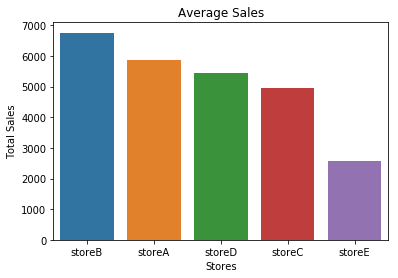

In [70]:
x = df_avg['Stores']
y = df_avg['Avg Sales']
sort = df_avg.sort_values('Avg Sales',ascending=False).Stores
sns.barplot(x=x,y=y,data=df_last_month,order=sort);
plt.xlabel('Stores')
plt.ylabel('Total Sales')
plt.title('Average Sales')
plt.show()

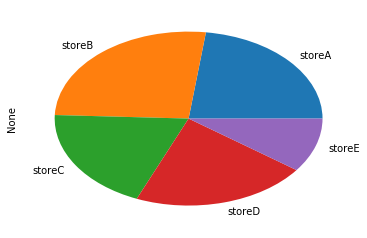

In [43]:
# Other way:
df.mean().plot(kind='pie');

In [8]:
# sales on march 13, 2016
df_march = df[df['week'] == '2016-03-13']
df_march

,week,storeA,storeB,storeC,storeD,storeE,year,month,day
97,2016-03-13,2054,1390,5112,5513,2536,2016,3,13


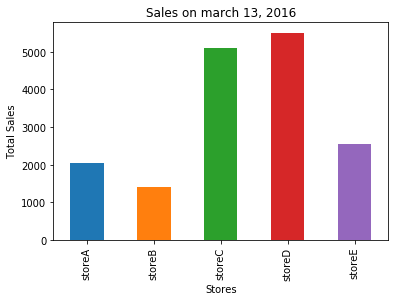

In [69]:
df.iloc[97,1:6].plot(kind='bar');
plt.xlabel('Stores')
plt.ylabel('Total Sales')
plt.title('Sales on march 13, 2016')
plt.show()

In [94]:
# Lowest sales for store c
df_c = df['storeC'].min(skipna=True)
df_c

927

In [95]:
# worst week for store C
df.iloc[9,0] 

Timestamp('2014-07-06 00:00:00')

In [10]:
# total sales during most recent 3 month period
df.tail(15)

,week,storeA,storeB,storeC,storeD,storeE,year,month,day
185,2017-11-19,9960,8529,4501,7631,505,2017,11,19
186,2017-11-26,6866,5011,5401,4736,3232,2017,11,26
187,2017-12-03,5179,3850,6121,6778,113,2017,12,3
188,2017-12-10,9348,5624,5446,5448,227,2017,12,10
189,2017-12-17,5310,8647,5680,7049,3578,2017,12,17
190,2017-12-24,8976,9503,6240,3882,2890,2017,12,24
191,2017-12-31,11875,1527,6711,5265,1701,2017,12,31
192,2018-01-07,8978,11312,4158,5019,3842,2018,1,7
193,2018-01-14,6963,4014,4215,7153,3097,2018,1,14
194,2018-01-21,5553,3971,3761,6255,3071,2018,1,21


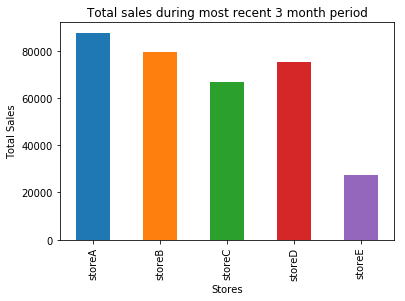

In [75]:
df_last = df.iloc[187:200,1:6]
df_last.sum().plot(kind='bar')
plt.xlabel('Stores')
plt.ylabel('Total Sales')
plt.title('Total sales during most recent 3 month period')
plt.show()

In [12]:
dict1 = dict()
for col in df_last.columns:
    if col[:5] == 'store':
        total = df_last[col].sum()
        dict1[col] = total
dict1

{'storeA': 87591,
 'storeB': 79394,
 'storeC': 66538,
 'storeD': 75190,
 'storeE': 27334}